<a href="https://colab.research.google.com/github/YasinEnigma/Scripts/blob/master/glasses_noGlasses_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 ! pip install -q kaggle

In [2]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yasina","key":"77927be3c7488c24330536d2368e5bc9"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

**Data Acquisition**

In [4]:
#importing the dataset from kaggle
!kaggle datasets download -d amol07/sunglasses-no-sunglasses

100% 54.0M/54.0M [00:03<00:00, 18.6MB/s]
100% 54.0M/54.0M [00:03<00:00, 14.4MB/s]


In [5]:
#unzip the dataset
import zipfile
zip_ref = zipfile.ZipFile('/content/sunglasses-no-sunglasses.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
#importing the libraries
import tensorflow as tf
import numpy as np
import cv2
import datetime
from tensorflow.keras.utils import load_img
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


**Data Pre-Processing**

In [7]:
#loading the dataset from directory & splitting
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/glasses_noGlasses/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/glasses_noGlasses/valid',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 3251 files belonging to 2 classes.
Found 604 files belonging to 2 classes.


In [8]:
#Normalize the data
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)  


**Model Building**

In [9]:
#Building the CNN Architecture

model= Sequential()

#first convolution layer with 32 Neurons
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Second convolution layer with 64 Neurons
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Third convolution layer with 128 Neurons
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Layer flattening
model.add(Flatten())

#First dense layer with 10% dropouts
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
#second dense layer with again 10% dropouts
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

#Output layer
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

**Model training**

In [11]:
# Model training with compilation
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_saved = model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10
102/102 [==============================] - 31s 120ms/step - loss: 0.7760 - accuracy: 0.9649 - val_loss: 1.2953 - val_accuracy: 0.7930
Epoch 2/10
102/102 [==============================] - 12s 115ms/step - loss: 0.4758 - accuracy: 0.9822 - val_loss: 1.9765 - val_accuracy: 0.8477
Epoch 3/10
102/102 [==============================] - 11s 105ms/step - loss: 0.4106 - accuracy: 0.9843 - val_loss: 15.3300 - val_accuracy: 0.7401
Epoch 4/10
102/102 [==============================] - 12s 115ms/step - loss: 0.5352 - accuracy: 0.9846 - val_loss: 0.8182 - val_accuracy: 0.9685
Epoch 5/10
102/102 [==============================] - 11s 103ms/step - loss: 0.1690 - accuracy: 0.9948 - val_loss: 0.8644 - val_accuracy: 0.9636
Epoch 6/10
102/102 [==============================] - 12s 114ms/step - loss: 0.1669 - accuracy: 0.9935 - val_loss: 0.6369 - val_accuracy: 0.9768
Epoch 7/10
102/102 [==============================] - 12s 114ms/step - loss: 0.1623 - accuracy: 0.9948 - val_loss: 0.5461 - val_a

In [12]:
#saving the model
model.save('/content/mymodel.h5',model_saved)

**Model Evaluation**

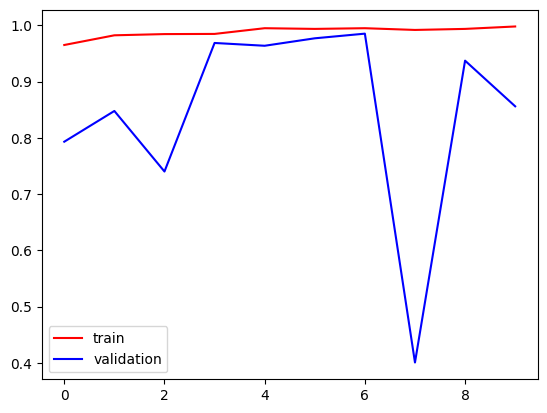

In [13]:
#plotting graph for accuracy
import matplotlib.pyplot as plt
plt.plot(model_saved.history['accuracy'],color='red',label='train')
plt.plot(model_saved.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

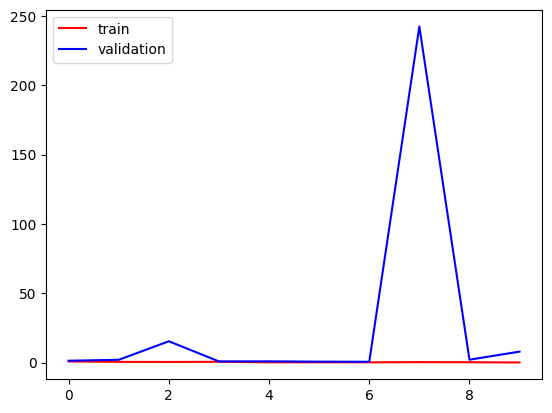

In [14]:
#plotting graph for loss
import matplotlib.pyplot as plt
plt.plot(model_saved.history['loss'],color='red',label='train')
plt.plot(model_saved.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**Model testing with random photo**

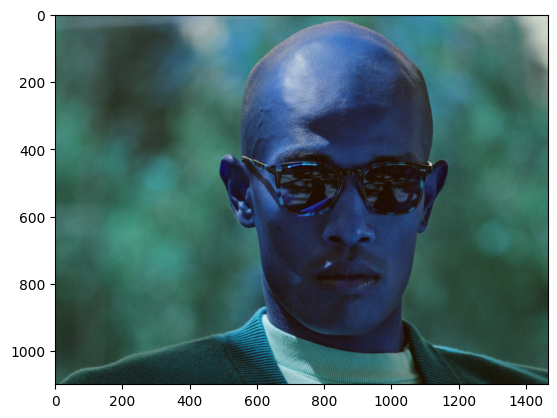

In [16]:
import cv2
test_img = cv2.imread("/content/best.jpg")
plt.imshow(test_img)

In [17]:
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
result = model.predict(test_input)

1/1 [==============================] - 0s 262ms/step


In [18]:
if result[0][0]==1:
  prediction="with glasses"
else:
  prediction='without glasses'  

print(prediction)  

with glasses


In [9]:
from enum import Enum
import os
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


class CNN_TYPE(Enum):
    VGGNET = 1
    GOOGLENET = 2
    RESNET = 3
    MOBILENET = 4  

current_cnn_type = CNN_TYPE.MOBILENET

def get_cnn_mode(type, image_shape):
    preprocess_input = []
    abc_model = []
    t2wi_model = []
    if type==CNN_TYPE.VGGNET:
        preprocess_input = tf.keras.applications.vgg16.preprocess_input
        model = tf.keras.applications.VGG16(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')
    elif type==CNN_TYPE.GOOGLENET:    
        preprocess_input = tf.keras.applications.inception_v3.preprocess_input
        model = tf.keras.applications.InceptionV3(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')
    elif type==CNN_TYPE.RESNET:    
        preprocess_input = tf.keras.applications.resnet50.preprocess_input
        model = tf.keras.applications.ResNet50(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')
    elif type==CNN_TYPE.MOBILENET:    
        preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
        model = tf.keras.applications.MobileNetV2(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')

    else:
        preprocess_input = tf.keras.applications.vgg19.preprocess_input
        model = tf.keras.applications.MobileNetV2(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')
    return preprocess_input, model

IMG_SHAPE = (224, 224, 3)
preprocess_input, base_model = get_cnn_mode(current_cnn_type, IMG_SHAPE)

# initialize the initial learning rate, number of epochs to train for,
# and batch size
LR = 1e-4
EPOCHS = 15
batch_size = 32
InputPath = "/content/glasses_noGlasses/train"
Clasess = ["no_glass", "with_glasses"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading train images...")

images = []
labels = []
for each_cls in Clasess:
    path = os.path.join(InputPath, each_cls)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        images.append(image)
        labels.append(each_cls)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

images = np.array(images, dtype="float32")
labels = np.array(labels)

X_train, Y_train = images, labels

# validation data load
# initialize the initial learning rate, number of epochs to train for,
# and batch size
InputPath = "/content/glasses_noGlasses/valid"
Clasess = ["no_glass", "with_glasses"]

# grab the list of images in our dataset directory, then initialize
# the list of data (i.e., images) and class images
print("[INFO] loading validation images...")

images = []
labels = []
for each_cls in Clasess:
    path = os.path.join(InputPath, each_cls)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = load_img(img_path, target_size=(224, 224))
        image = img_to_array(image)
        image = preprocess_input(image)
        images.append(image)
        labels.append(each_cls)

# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

images = np.array(images, dtype="float32")
labels = np.array(labels)

X_test, Y_test = images, labels

# construct the training image generator for data augmentation
data_augumentation = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

# construct the head of the model that will be placed on top of the
# the base model
model = base_model.output
#model = AveragePooling2D(pool_size=(7, 7))(model)

model=tf.keras.layers.GlobalAveragePooling2D()(model)
model = Flatten(name="flatten")(model)
model = Dense(128, activation="relu")(model)
model = Dropout(0.5)(model)
model = Dense(2, activation="softmax")(model)

model = Model(inputs=base_model.input, outputs=model)

for layer in base_model.layers:
    layer.trainable = False
# compile our model
opt = tf.keras.optimizers.legacy.Adam(lr=LR, decay=LR / EPOCHS) 
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])


model.summary()

history = model.fit(data_augumentation.flow(X_train, Y_train, batch_size=batch_size),steps_per_epoch=len(X_train) // batch_size,validation_data=(X_test, Y_test),
    validation_steps=len(X_test) // batch_size,
    epochs=EPOCHS)


[INFO] loading train images...
[INFO] loading validation images...
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                         

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


 block_2_project (Conv2D)       (None, 56, 56, 24)   3456        ['block_2_depthwise_relu[0][0]'] 
                                                                                                  
 block_2_project_BN (BatchNorma  (None, 56, 56, 24)  96          ['block_2_project[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_2_add (Add)              (None, 56, 56, 24)   0           ['block_1_project_BN[0][0]',     
                                                                  'block_2_project_BN[0][0]']     
                                                                                                  
 block_3_expand (Conv2D)        (None, 56, 56, 144)  3456        ['block_2_add[0][0]']            
                                                                                                  
 block_3_e

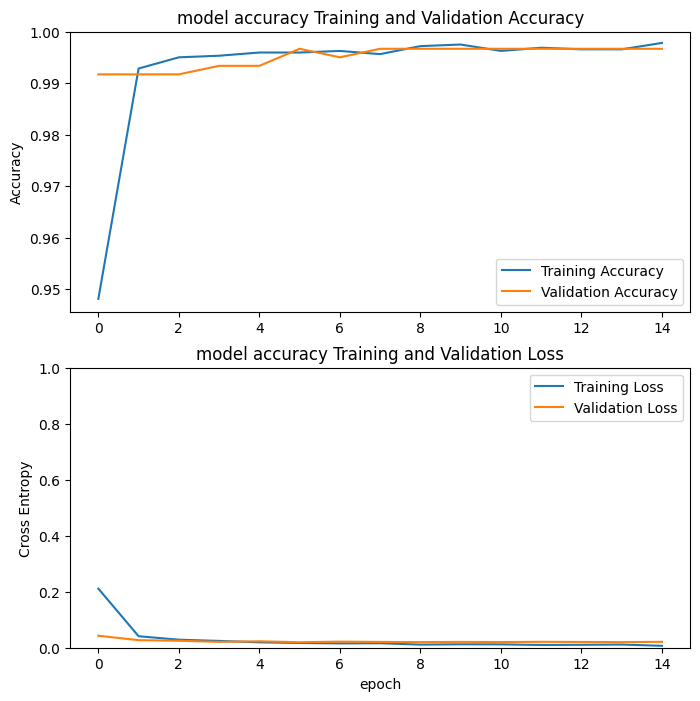

In [10]:
import matplotlib.pyplot as plt
def train_histor_view(history, name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label= 'Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title(name + ' ' + 'Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title(name + ' ' + 'Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

train_histor_view(history, 'model accuracy')

In [11]:
from sklearn.metrics import classification_report

# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(X_test, batch_size=batch_size)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(Y_test.argmax(axis=1), predIdxs,target_names=lb.classes_))

[INFO] evaluating network...
19/19 [==============================] - 2s 42ms/step
              precision    recall  f1-score   support

    no_glass       0.99      1.00      1.00       362
with_glasses       1.00      0.99      1.00       242

    accuracy                           1.00       604
   macro avg       1.00      1.00      1.00       604
weighted avg       1.00      1.00      1.00       604



Confusion matrix, without normalization
[[362   0]
 [  2 240]]


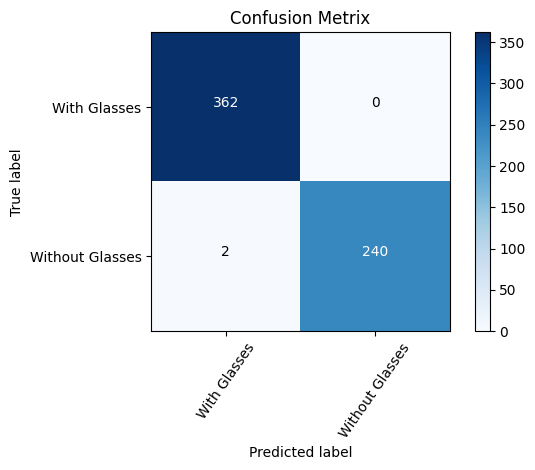

In [12]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(Y_test.argmax(axis=1), predIdxs)

cm_plot_label =['With Glasses', 'Without Glasses']
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix')

In [13]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary. 
    # This would allow return of other measures other than sensitivity and specificity
    
    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0
    
    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)
    
    # Calculate accuracy
    accuracy = np.mean(y_pred_test == y_test)
    
    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)
    
    return sensitivity, specificity, accuracy

sensitivity, specificity, accuracy = calculate_sensitivity_specificity(Y_test.argmax(axis=1), predIdxs)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.9917355371900827
Specificity: 1.0
Accuracy: 0.9966887417218543


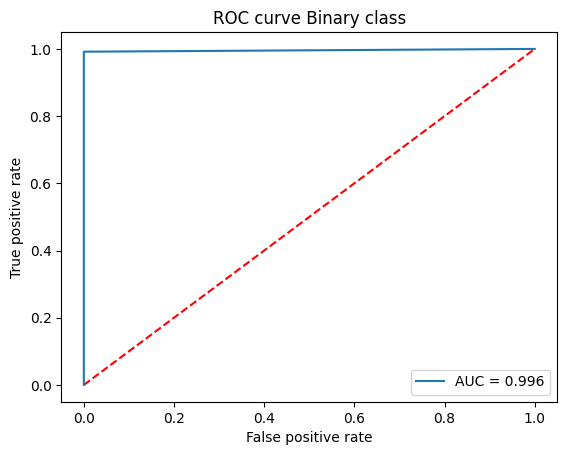

In [14]:
from sklearn.metrics import roc_auc_score, auc
from sklearn.metrics import roc_curve
roc_log = roc_auc_score(Y_test.argmax(axis=1), predIdxs)
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test.argmax(axis=1), predIdxs)
area_under_curve = auc(false_positive_rate, true_positive_rate)

plt.plot([0, 1], [0, 1], 'r--')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Binary class')
plt.legend(loc='best')
plt.show()
#plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
plt.close()

In [15]:
# saving and loading the .h5 model

# save model
model.save('MOBILENET.h5')
print('Model Saved!')

Model Saved!


In [16]:
from tensorflow.keras.models import load_model

# load model
savedModel=load_model('MOBILENET.h5')
savedModel.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                           